In [21]:
import pandas as pd
import sys
sys.path.insert(1, r'C:\Users\berna\Desktop\compes\DATATHON UPC FME 2023\healthcare_challenge')
from utils import *
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [114]:
# load train data
df = pd.read_csv('../data/consumo_material_clean_with_category.csv', parse_dates=['FECHAPEDIDO'])
df.reset_index(inplace=True, drop=True)
# df_train = pd.read_csv('../data/consumo_no23.csv')
# df_test = pd.read_csv('../data/consumo_23.csv')

df_prep = preprocess_cosumo(df)
df_train = df_prep[df_prep['FECHAPEDIDO']<dt.datetime(year=2023,month=1,day=1)]
df_train = df_train[df_train['FECHAPEDIDO'] >= dt.datetime(year=2020,month=1,day=1)]
df_test = df_prep[df_prep['FECHAPEDIDO']>=dt.datetime(year=2023,month=1,day=1)]

asjfkjdsfljds


In [115]:
X = df_train.drop(columns=['STACKS_COMPRATS'])
X = X.reset_index(drop=True)
y = df_train['STACKS_COMPRATS']

In [116]:
X

,FECHAPEDIDO,UNIDADESCONSUMOCONTENIDAS,PRECIO,CODIGO_B40558,CODIGO_B41691,CODIGO_C26183,CODIGO_C56207,CODIGO_E64488,CODIGO_E64543,CODIGO_E64544,...,CODIGO_F43331,CODIGO_F43580,CODIGO_F43581,CODIGO_F43585,CODIGO_F44200,CODIGO_F46843,CODIGO_F46846,CODIGO_F50071,TIPOCOMPRA_Compra menor,TIPOCOMPRA_Concurso
0,2021-01-02,5,12.100000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2021-01-02,5,12.100000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2021-01-02,5,26.399925,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-01-02,300,27.588000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-01-02,300,49.302000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672,2022-10-31,5,12.100000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6673,2022-10-31,5,26.399925,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6674,2022-10-31,5,5.652900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6675,2022-10-31,5,412.500000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [117]:
X_test = df_test.drop(columns=['STACKS_COMPRATS'])
X_test.reset_index(drop=True, inplace=True)
y_test = df_test['STACKS_COMPRATS']
y_test.reset_index(drop=True, inplace=True)

In [118]:
y_test.shape

(2340,)

In [119]:
preds = pd.read_csv('../predictions.csv', header=None)

In [120]:
preds.shape

(2340, 1)

In [121]:
y_test

0        6
1       10
2       22
3        3
4        4
        ..
2335     4
2336     6
2337     4
2338     2
2339     1
Name: STACKS_COMPRATS, Length: 2340, dtype: int64

In [122]:
preds

,0
0,9.577018
1,5.711097
2,4.900468
3,2.530467
4,1.312741
...,...
2335,109.494049
2336,33.307377
2337,55.923973
2338,33.307377


In [123]:
len(X['UNIDADESCONSUMOCONTENIDAS'][X['UNIDADESCONSUMOCONTENIDAS']<10])

1932

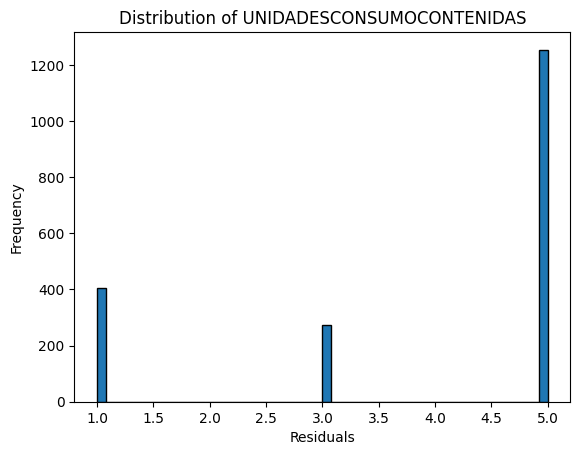

In [124]:
# Create a histogram of residuals
plt.hist(X['UNIDADESCONSUMOCONTENIDAS'][X['UNIDADESCONSUMOCONTENIDAS']<10], bins=50, edgecolor='black')
plt.title('Distribution of UNIDADESCONSUMOCONTENIDAS')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

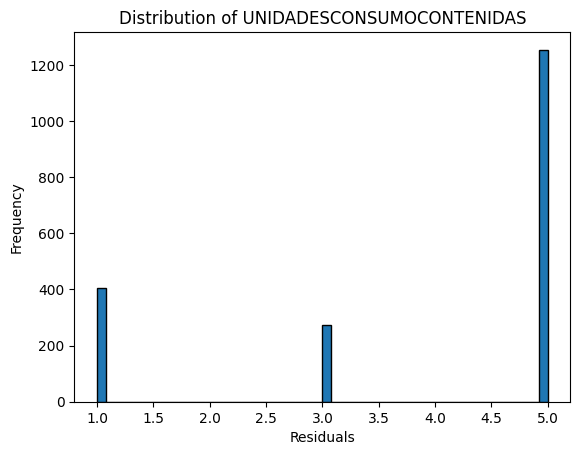

In [125]:
# Create a histogram of residuals
plt.hist(X['UNIDADESCONSUMOCONTENIDAS'][X['UNIDADESCONSUMOCONTENIDAS']<10], bins=50, edgecolor='black')
plt.title('Distribution of UNIDADESCONSUMOCONTENIDAS')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [126]:
df

,CODIGO,FECHAPEDIDO,UNIDADESCONSUMOCONTENIDAS,PRECIO,TIPOCOMPRA,TGL,STACKS_COMPRATS
0,E99808,2023-01-01,10,62.590000,Compra menor,TRANSITO,6
1,B41691,2016-01-02,10,102.803729,Compra menor,ALMACENABLE,4
2,E64543,2016-01-02,5,12.100000,Compra menor,TRANSITO,4
3,E65007,2016-01-02,50,215.325000,Concurso,ALMACENABLE,2
4,E64911,2017-01-02,300,792.000000,Concurso,ALMACENABLE,1
...,...,...,...,...,...,...,...
15693,E64543,2023-10-31,5,12.100000,Compra menor,TRANSITO,6
15694,E64543,2023-10-31,5,12.100000,Compra menor,TRANSITO,4
15695,E64543,2023-10-31,5,12.100000,Compra menor,TRANSITO,2
15696,F50071,2023-10-31,5,114.950000,Compra menor,TRANSITO,1


,CODIGO,FECHAPEDIDO,UNIDADESCONSUMOCONTENIDAS,PRECIO,TIPOCOMPRA,TGL,STACKS_COMPRATS
0,E64543,2016-01-02,5,12.100000,Compra menor,TRANSITO,4
1,E64543,2018-01-02,5,12.100000,Compra menor,TRANSITO,8
2,E65056,2018-01-02,3,1.851300,Compra menor,ALMACENABLE,294
3,E64761,2019-01-02,5,13.497000,Compra menor,TRANSITO,10
4,E64543,2021-01-02,5,12.100000,Compra menor,TRANSITO,10
...,...,...,...,...,...,...,...
4519,E64543,2022-10-31,5,12.100000,Compra menor,TRANSITO,4
4520,E64663,2022-10-31,5,26.399925,Concurso,ALMACENABLE,61
4521,E65485,2022-10-31,5,5.652900,Concurso,ALMACENABLE,42
4522,F43580,2022-10-31,5,412.500000,Compra menor,TRANSITO,4


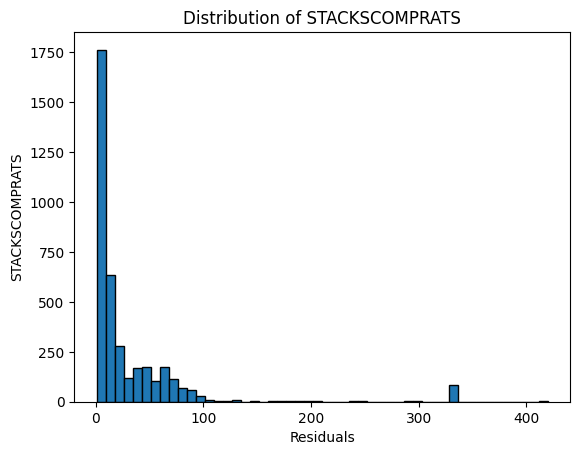

In [137]:
lt10 = df['UNIDADESCONSUMOCONTENIDAS']<10
lt10.reset_index(drop=True, inplace=True)
filteredlt10 = df[lt10].reset_index(drop=True)
filteredlt10 = filteredlt10[filteredlt10['FECHAPEDIDO'].dt.year < 2023]
display(filteredlt10)

# Create a histogram of residuals
plt.hist(filteredlt10['STACKS_COMPRATS'], bins=50, edgecolor='black')
plt.title('Distribution of STACKSCOMPRATS')
plt.xlabel('Residuals')
plt.ylabel('STACKSCOMPRATS')
plt.show()

In [141]:
len(filteredlt10[filteredlt10['STACKS_COMPRATS']>110]['CODIGO'])

145

In [140]:
list(filteredlt10[filteredlt10['STACKS_COMPRATS']>110]['CODIGO'])

['E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E70130',
 'E64663',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E64663',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',
 'E65056',

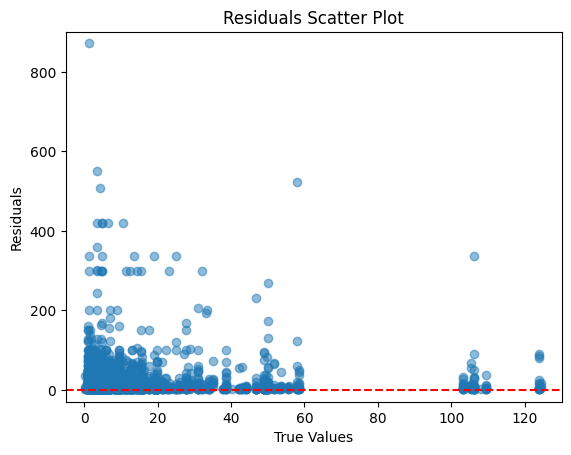

In [71]:
fig, ax = plt.subplots()
ax.scatter(preds, y_test, alpha=0.5)
# plt.scatter(preds, y_test, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals Scatter Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
ax.set_xlim(-5, 130)
ax.set_ylim(-30,900)
plt.show()

In [78]:
y_test[X_test['UNIDADESCONSUMOCONTENIDAS']<10]

1       10
3        3
4        4
5        2
9       91
        ..
2335     4
2336     6
2337     4
2338     2
2339     1
Name: STACKS_COMPRATS, Length: 697, dtype: int64

In [82]:
preds[X_test['UNIDADESCONSUMOCONTENIDAS']<10]

,0
1,5.711097
3,2.530467
4,1.312741
5,9.577018
9,3.894953
...,...
2335,109.494049
2336,33.307377
2337,55.923973
2338,33.307377


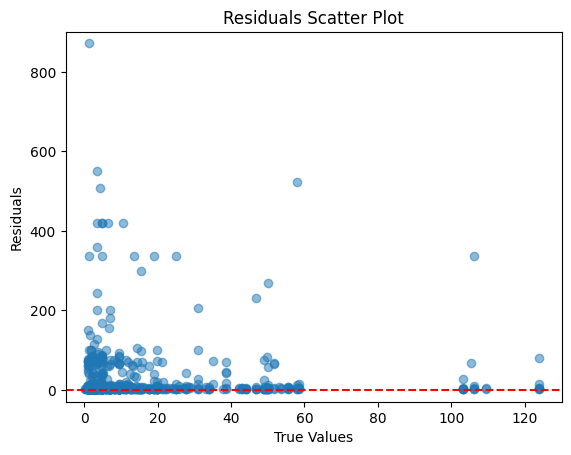

In [80]:
fig, ax = plt.subplots()
ax.scatter(preds[X_test['UNIDADESCONSUMOCONTENIDAS']<10], y_test[X_test['UNIDADESCONSUMOCONTENIDAS']<10], alpha=0.5)
# plt.scatter(preds, y_test, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals Scatter Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
ax.set_xlim(-5, 130)
ax.set_ylim(-30,900)
plt.show()

In [63]:
len(y_test[y_test<10])

1300